<a href="https://colab.research.google.com/github/suneelmatham/rl-trading/blob/master/X2_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! git clone https://github.com/wai-i/Pair-Trading-Reinforcement-Learning.git

Cloning into 'Pair-Trading-Reinforcement-Learning'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 136 (delta 1), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (136/136), 10.13 MiB | 4.89 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [7]:
% cd /content/Pair-Trading-Reinforcement-Learning
! ls

/content/Pair-Trading-Reinforcement-Learning
CONFIG	EXAMPLE  MAIN	    README.md	      STATICS	Structure.PNG  venv
DATA	LICENSE  PROCESSOR  requirements.txt  STRATEGY	UTIL


In [0]:
import pandas as pd
import numpy as np
import MAIN.Basics as basics
import MAIN.Reinforcement as RL
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from UTIL import FileIO
from STRATEGY.Cointegration import EGCointegration

In [0]:
config_path  = 'CONFIG/config_train.yml'
config_train = FileIO.read_yaml(config_path)

In [0]:
x = pd.read_csv('STATICS/PRICE/JNJ.csv')
y = pd.read_csv('STATICS/PRICE/PG.csv')
x, y = EGCointegration.clean_data(x, y, 'date', 'close')

In [0]:
# Separate training and testing sets
train_pct = 0.7
train_len = round(len(x) * 0.7)
idx_train = list(range(0, train_len))
idx_test  = list(range(train_len, len(x)))
EG_Train = EGCointegration(x.iloc[idx_train, :], y.iloc[idx_train, :], 'date', 'close')
EG_Test  = EGCointegration(x.iloc[idx_test,  :], y.iloc[idx_test,  :], 'date', 'close')

In [0]:
# Create action space
n_hist    = list(np.arange(60, 601, 60))
n_forward = list(np.arange(120, 1201, 120))
trade_th  = list(np.arange(1,  5.1, 1))
stop_loss = list(np.arange(1,  2.1, 0.5))
cl        = list(np.arange(0.05,  0.11, 0.05))
actions   = {'n_hist':    n_hist,
             'n_forward': n_forward,
             'trade_th':  trade_th,
             'stop_loss': stop_loss,
             'cl':        cl}
n_action  = int(np.product([len(actions[key]) for key in actions.keys()]))

In [0]:
# Create state space
transaction_cost = [0.001]
states  = {'transaction_cost': transaction_cost}
n_state = len(states)

In [0]:
# Assign state and action spaces to config
config_train['StateSpaceState'] = states
config_train['ActionSpaceAction'] = actions

In [19]:
# Create and build network
one_hot  = {'one_hot': {'func_name':  'one_hot',
                        'input_arg':  'indices',
                         'layer_para': {'indices': None,
                                        'depth': n_state}}}
output_layer = {'final': {'func_name':  'fully_connected',
                          'input_arg':  'inputs',
                          'layer_para': {'inputs': None,
                                         'num_outputs': n_action,
                                         'biases_initializer': None,
                                         'activation_fn': tf.nn.relu,
                                         'weights_initializer': tf.ones_initializer()}}}

state_in = tf.placeholder(shape=[1], dtype=tf.int32)

N = basics.Network(state_in)
N.build_layers(one_hot)
N.add_layer_duplicates(output_layer, 1)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.


In [20]:
# Create learning object and perform training
RL_Train = RL.ContextualBandit(N, config_train, EG_Train)

In [21]:
sess = tf.Session()
RL_Train.process(sess, save=False, restore=False)


Counter [Iteration]: 1000 steps processed...
Counter [Iteration]: 2000 steps processed...
Counter [Iteration]: 3000 steps processed...
Counter [Iteration]: 4000 steps processed...
Counter [Iteration]: 5000 steps processed...
Counter [Iteration]: 6000 steps processed...
Counter [Iteration]: 7000 steps processed...
Counter [Iteration]: 8000 steps processed...
Counter [Iteration]: 9000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 10000 steps processed...
Counter [Iteration]: 11000 steps processed...
Counter [Iteration]: 12000 steps processed...
Counter [Iteration]: 13000 steps processed...
Counter [Iteration]: 14000 steps processed...
Counter [Iteration]: 15000 steps processed...
Counter [Iteration]: 16000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 17000 steps processed...
Counter [Iteration]: 18000 steps processed...
Counter [Iteration]: 19000 steps processed...
Counter [Iteration]: 20000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 1 steps processed...
Counter [Iteration]: 21000 steps processed...
Counter [Iteration]: 22000 steps processed...
Counter [Iteration]: 23000 steps processed...
Counter [Iteration]: 24000 steps processed...
Counter [Iteration]: 25000 steps processed...
Counter [Iteration]: 26000 steps processed...
Counter [Iteration]: 27000 steps processed...
Counter [Iteration]: 28000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 29000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 30000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 2 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 31000 steps processed...
Counter [Iteration]: 32000 steps processed...
Counter [Iteration]: 33000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 34000 steps processed...
Counter [Iteration]: 35000 steps processed...
Counter [Iteration]: 36000 steps processed...
Counter [Iteration]: 37000 steps processed...
Counter [Iteration]: 38000 steps processed...
Counter [BoltzmannTemp]: Process completed.
Counter [Iteration]: 39000 steps processed...
Counter [Iteration]: 40000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 3 steps processed...
Counter [Iteration]: 41000 steps processed...
Counter [Iteration]: 42000 steps processed...
Counter [Iteration]: 43000 steps processed...
Counter [Iteration]: 44000 steps processed...
Counter [Iteration]: 45000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 46000 steps processed...
Counter [Iteration]: 47000 steps processed...
Counter [Iteration]: 48000 steps processed...
Counter [Iteration]: 49000 steps processed...
Counter [Iteration]: 50000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 4 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 51000 steps processed...
Counter [Iteration]: 52000 steps processed...
Counter [Iteration]: 53000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 54000 steps processed...
Counter [Iteration]: 55000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 56000 steps processed...
Counter [Iteration]: 57000 steps processed...
Counter [Iteration]: 58000 steps processed...
Counter [Iteration]: 59000 steps processed...
Counter [Iteration]: 60000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 5 steps processed...
Counter [Iteration]: 61000 steps processed...
Counter [Iteration]: 62000 steps processed...
Counter [Iteration]: 63000 steps processed...
Counter [Iteration]: 64000 steps processed...
Counter [Iteration]: 65000 steps processed...
Counter [Iteration]: 66000 steps processed...
Counter [Iteration]: 67000 steps processed...
Counter [Iteration]: 68000 steps processed...
Counter [Iteration]: 69000 steps processed...
Counter [Iteration]: 70000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 6 steps processed...
Counter [Iteration]: 71000 steps processed...
Counter [Iteration]: 72000 steps processed...
Counter [Iteration]: 73000 steps processed...
Counter [Iterati

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 75000 steps processed...
Counter [Iteration]: 76000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 77000 steps processed...
Counter [Iteration]: 78000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 79000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 80000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 7 steps processed...
Counter [Iteration]: 81000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Counter [Iteration]: 82000 steps processed...
Counter [Iteration]: 83000 steps processed...
Counter [Iteration]: 84000 steps processed...
Counter [Iteration]: 85000 steps processed...
Counter [Iteration]: 86000 steps processed...
Counter [Iteration]: 87000 steps processed...
Counter [Iteration]: 88000 steps processed...
Counter [Iteration]: 89000 steps processed...
Counter [Iteration]: 90000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 8 steps processed...
Counter [Iteration]: 91000 steps processed...
Counter [Iteration]: 92000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Counter [Iteration]: 93000 steps processed...
Counter [Iteration]: 94000 steps processed...
Counter [Iteration]: 95000 steps processed...
Counter [Iteration]: 96000 steps processed...
Counter [Iteration]: 97000 steps processed...
Counter [Iteration]: 98000 steps processed...
Counter [Iteration]: 99000 steps processed...
Counter [Iteration]: 100000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 9 steps processed...
Counter [Iteration]: 101000 steps processed...
Counter [Iteration]: 102000 steps processed...
Counter [Iteration]: 103000 steps processed...
Counter [Iteration]: 104000 steps processed...
Counter [Iteration]: 105000 steps processed...


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Counter [Iteration]: 106000 steps processed...
Counter [Iteration]: 107000 steps processed...
Counter [Iteration]: 108000 steps processed...
Counter [Iteration]: 109000 steps processed...
Counter [Iteration]: 110000 steps processed...
Counter [Iteration]: Process completed.
Counter [Epoch]: 10 steps processed...
Counter [Epoch]: Process completed.


In [22]:
# Extract training results
action = RL_Train.recorder.record['NETWORK_ACTION']
reward = RL_Train.recorder.record['ENGINE_REWARD']
print(np.mean(reward))

-0.005513650285936302


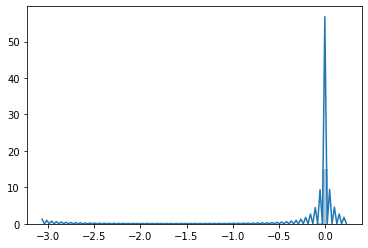

In [23]:
df1 = pd.DataFrame()
df1['action'] = action
df1['reward'] = reward
mean_reward = df1.groupby('action').mean()
sns.distplot(mean_reward)

In [0]:
# Test by trading continuously
[opt_action] = sess.run([RL_Train.output], feed_dict=RL_Train.feed_dict)
opt_action = np.argmax(opt_action)
action_dict = RL_Train.action_space.convert(opt_action, 'index_to_dict')
indices = range(601, len(EG_Test.x) - 1200)

In [0]:
pnl = pd.DataFrame()
pnl['Time'] = EG_Test.timestamp
pnl['Trade_Profit'] = 0
pnl['Cost'] = 0
pnl['N_Trade'] = 0

In [26]:
import warnings
warnings.filterwarnings('ignore')
for i in indices:
    if i % 100 == 0:
        print(i)
    EG_Test.process(index=i, transaction_cost=0.001, **action_dict)
    trade_record = EG_Test.record
    if (trade_record is not None) and (len(trade_record) > 0):
        print('value at {}'.format(i))
        trade_record = pd.DataFrame(trade_record)
        trade_cost   = trade_record.groupby('trade_time')['trade_cost'].sum()
        close_cost   = trade_record.groupby('close_time')['close_cost'].sum()
        profit       = trade_record.groupby('close_time')['profit'].sum()
        open_pos     = trade_record.groupby('trade_time')['long_short'].sum()
        close_pos    = trade_record.groupby('close_time')['long_short'].sum() * -1

        pnl['Cost'].loc[pnl['Time'].isin(trade_cost.index)] += trade_cost.values
        pnl['Cost'].loc[pnl['Time'].isin(close_cost.index)] += close_cost.values
        pnl['Trade_Profit'].loc[pnl['Time'].isin(close_cost.index)] += profit.values
        pnl['N_Trade'].loc[pnl['Time'].isin(trade_cost.index)] += open_pos.values
        pnl['N_Trade'].loc[pnl['Time'].isin(close_cost.index)] += close_pos.values

warnings.filterwarnings(action='once')

700
800
value at 801
value at 860
value at 863
value at 866
value at 867
value at 868
value at 869
value at 870
value at 871
value at 872
value at 873
value at 874
value at 875
value at 876
value at 877
value at 878
value at 879
value at 880
value at 881
value at 882
value at 883
value at 884
value at 885
value at 886
value at 887
value at 888
value at 889
value at 890
value at 891
value at 892
value at 893
value at 894
value at 895
value at 896
value at 897
value at 898
value at 899
900
value at 900
value at 901
value at 902
value at 903
value at 904
value at 905
value at 906
value at 907
value at 908
value at 909
value at 910
value at 911
value at 912
value at 913
value at 914
value at 915
value at 916
value at 917
value at 918
value at 919
value at 920
value at 921
value at 922
value at 923
value at 924
value at 925
value at 926
value at 927
value at 928
value at 929
value at 930
value at 931
value at 932
value at 933
value at 934
value at 935
value at 936
value at 937
value at 938


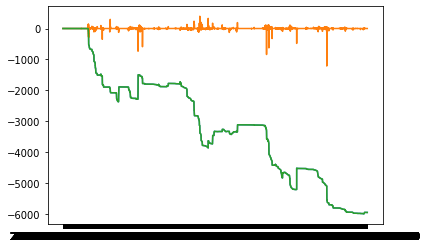

In [27]:
# Plot the testing result
pnl['PnL'] = (pnl['Trade_Profit'] - pnl['Cost']).cumsum()
plt.plot(pnl['PnL'])
plt.plot(pnl['N_Trade'])
plt.plot(pnl['Time'], pnl['PnL'])

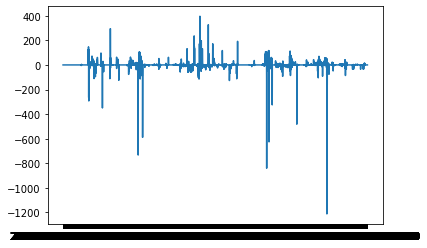

In [28]:
plt.plot(pnl['Time'], pnl['N_Trade'])

In [29]:
len(pnl)

16800

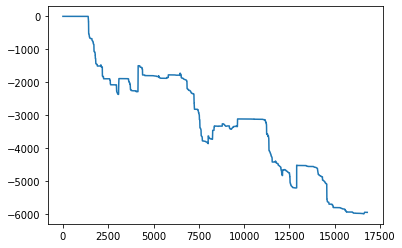

In [30]:
plt.plot(pnl['PnL'])

In [0]:
sess.close()